#Khai báo thư viện 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Chuẩn bị dữ liệu

In [3]:
url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter07/Dataset/heart.csv'
df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.rename(index = str, columns = {
    'cp' : 'chest_pain',
    'trestbps' : 'rest_bp', 
    'fbs' : 'fast_bld_sugar', 
    'restecg' : 'rest_ecg', 
    'thalach' : 'max_hr', 
    'exang' : 'ex_angina', 
    'oldpeak' : 'st_depr', 
    'ca' : 'colored_vessels',
    'thal' : 'thalassemia', 
}, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   sex              303 non-null    int64  
 2   chest_pain       303 non-null    int64  
 3   rest_bp          303 non-null    int64  
 4   chol             303 non-null    int64  
 5   fast_bld_sugar   303 non-null    int64  
 6   rest_ecg         303 non-null    int64  
 7   max_hr           303 non-null    int64  
 8   ex_angina        303 non-null    int64  
 9   st_depr          303 non-null    float64
 10  slope            303 non-null    int64  
 11  colored_vessels  303 non-null    int64  
 12  thalassemia      303 non-null    int64  
 13  target           303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5+ KB


In [37]:
df.isnull().any()

age                False
sex                False
chest_pain         False
rest_bp            False
chol               False
fast_bld_sugar     False
rest_ecg           False
max_hr             False
ex_angina          False
st_depr            False
slope              False
colored_vessels    False
thalassemia        False
target             False
age_category       False
chol_cat            True
dtype: bool

In [63]:
df.isnull().sum()

age                0
sex                0
chest_pain         0
rest_bp            0
chol               0
fast_bld_sugar     0
rest_ecg           0
max_hr             0
ex_angina          0
st_depr            0
slope              0
colored_vessels    0
thalassemia        0
target             0
age_category       0
chol_cat           5
dtype: int64

#Trực quan hoá


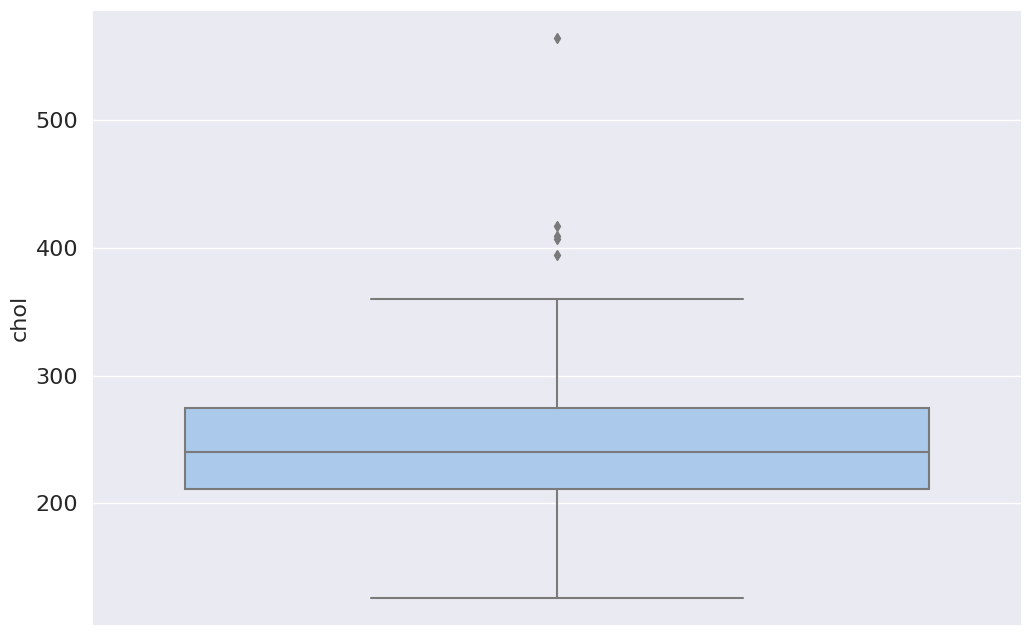

In [54]:
sns.set(palette = 'pastel', rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 16, "ytick.labelsize" : 16 })

chol = sns.boxplot(df['chol']).set(ylabel='chol',xticklabels=[])
plt.show()

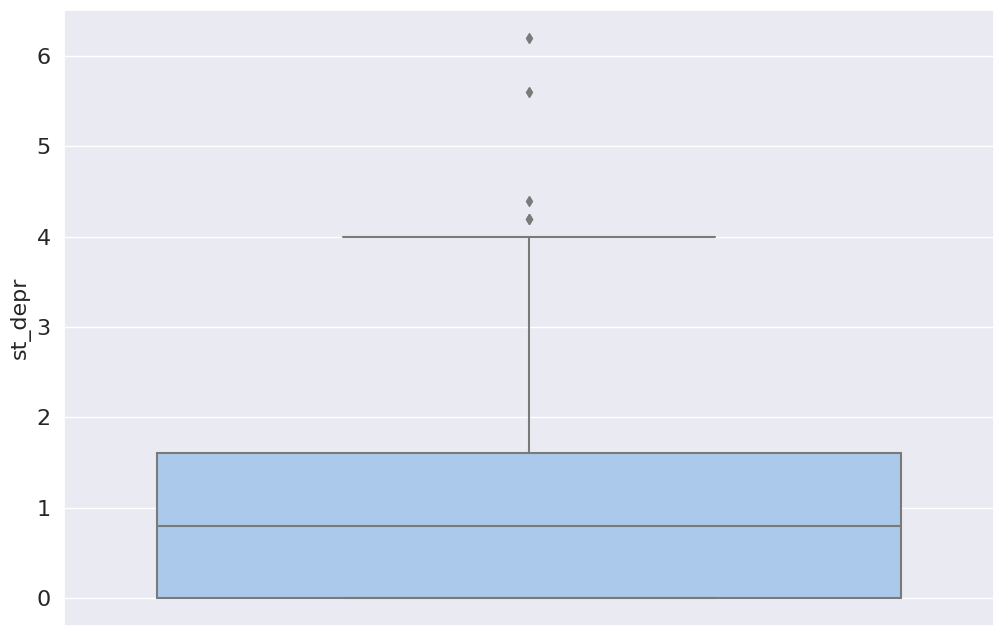

In [55]:
sd = sns.boxplot(df['st_depr']).set(ylabel='st_depr',xticklabels=[])
plt.show()

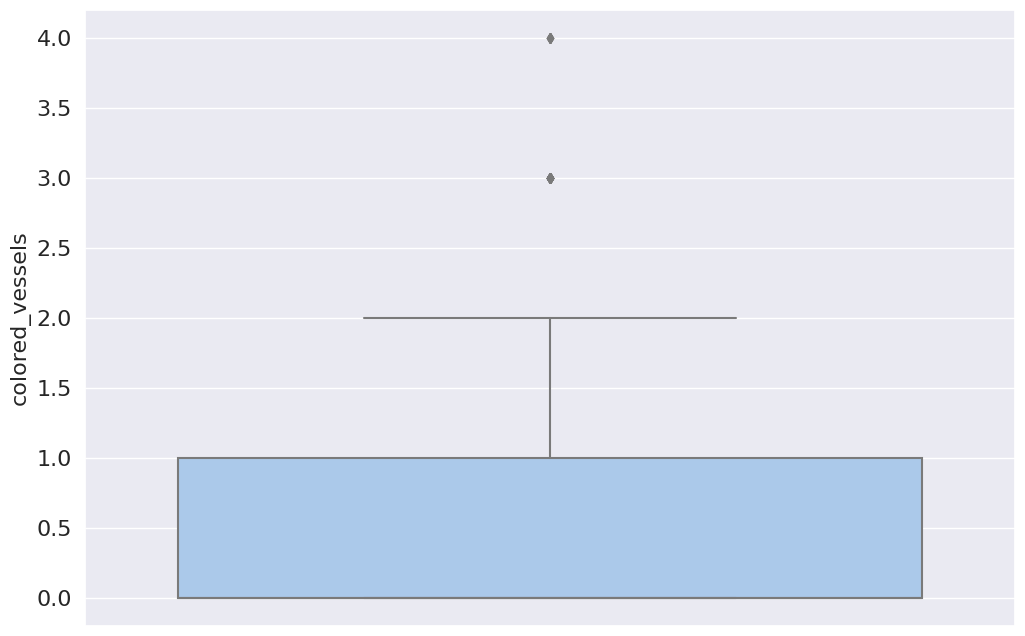

In [56]:
cv = sns.boxplot(df['colored_vessels']).set(ylabel='colored_vessels',xticklabels=[])
plt.show()

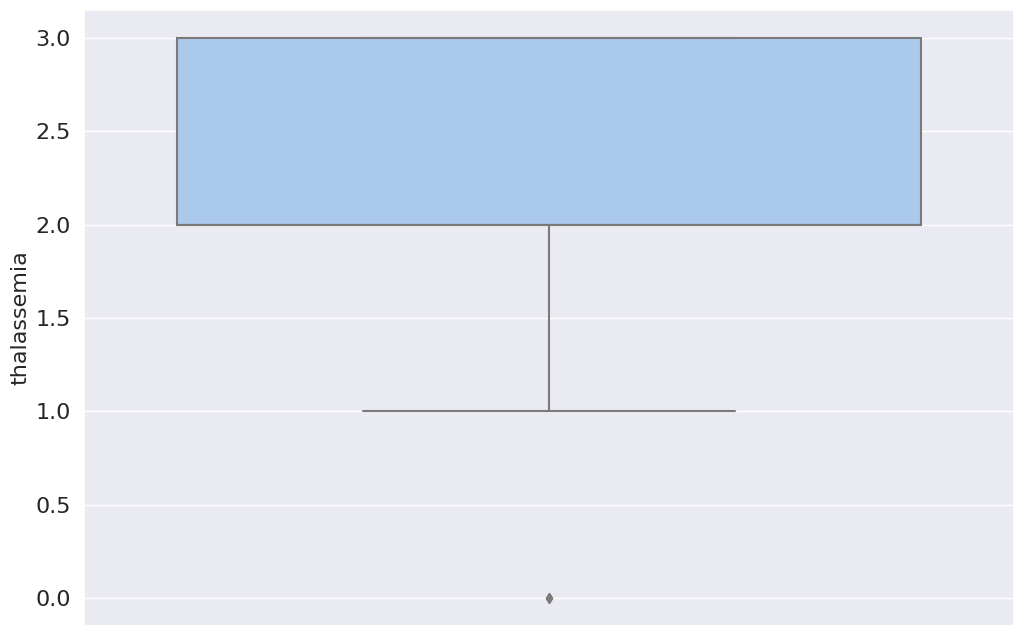

In [57]:
t = sns.boxplot(df['thalassemia']).set(ylabel='thalassemia',xticklabels=[])
plt.show()

In [12]:
sns.set(palette = 'pastel', rc = {"figure.figsize": (16,10), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 14, "ytick.labelsize" : 16 })

Text(0.5, 0, 'Age')

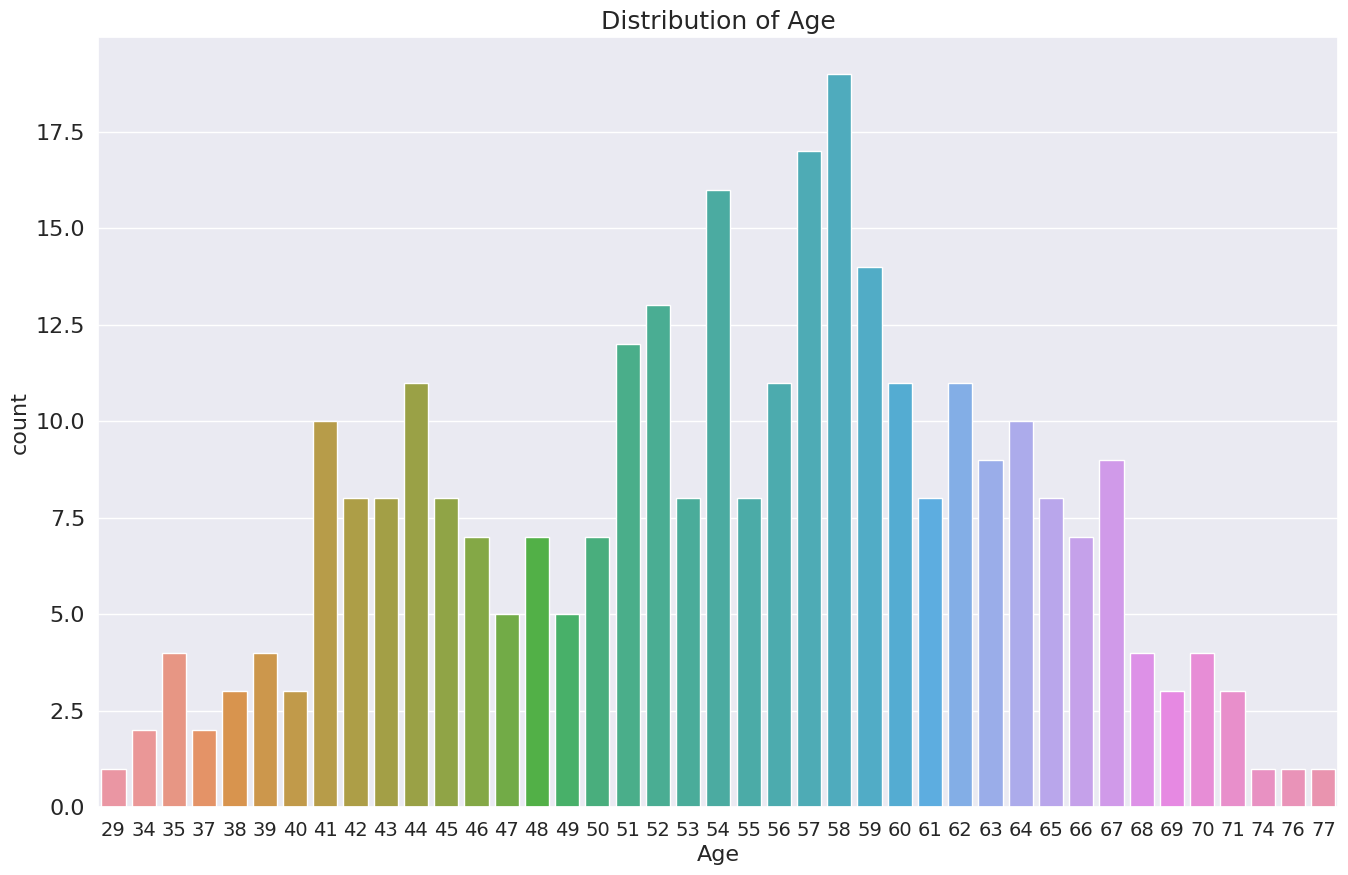

In [13]:
g = sns.countplot(x = 'age', data = df)
g.set_title('Distribution of Age')
plt.xlabel('Age')

In [14]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

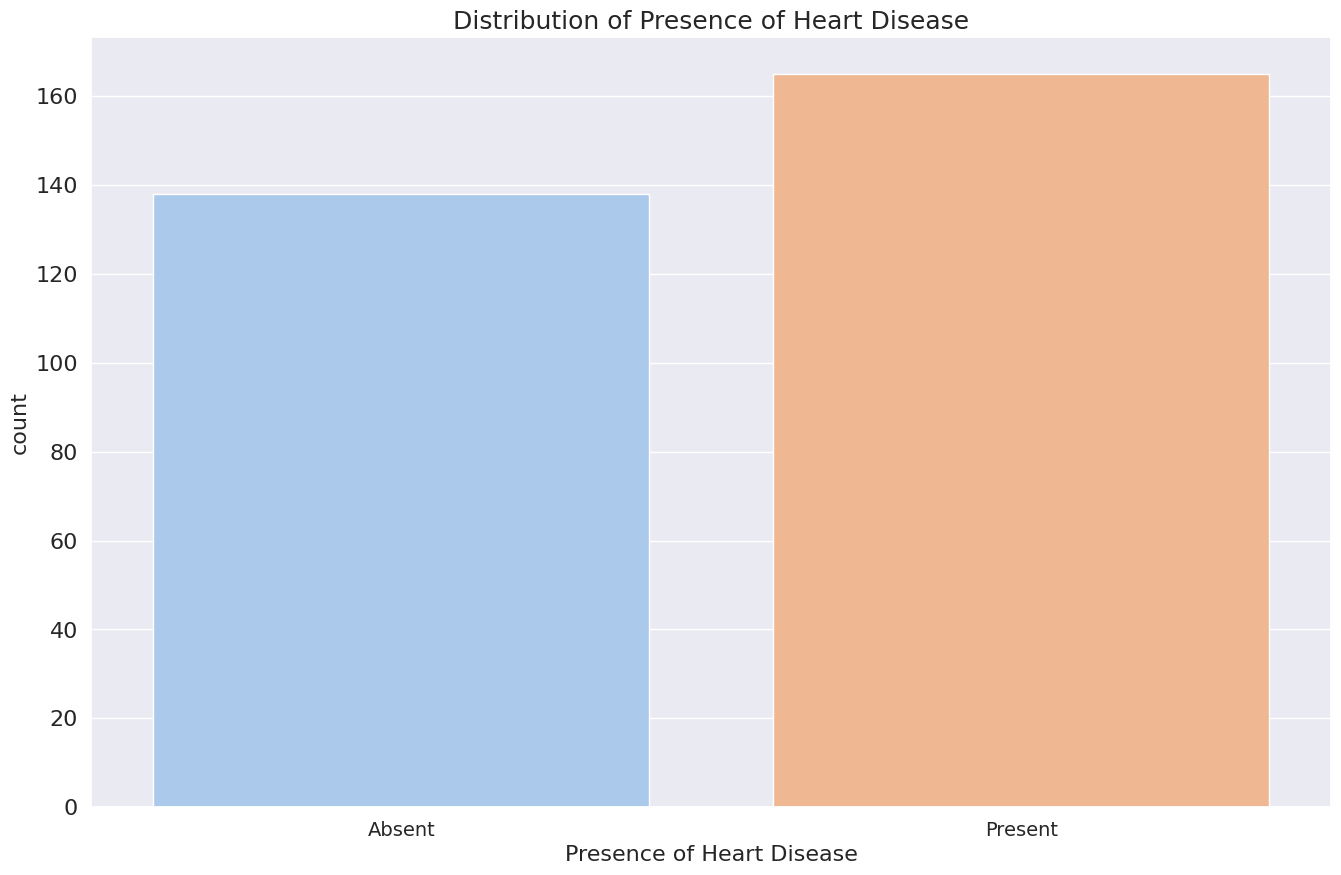

In [15]:
a = sns.countplot(x = 'target', data = df)
a.set_title('Distribution of Presence of Heart Disease')
a.set_xticklabels(['Absent', 'Present'])
plt.xlabel("Presence of Heart Disease")
plt.show()

In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

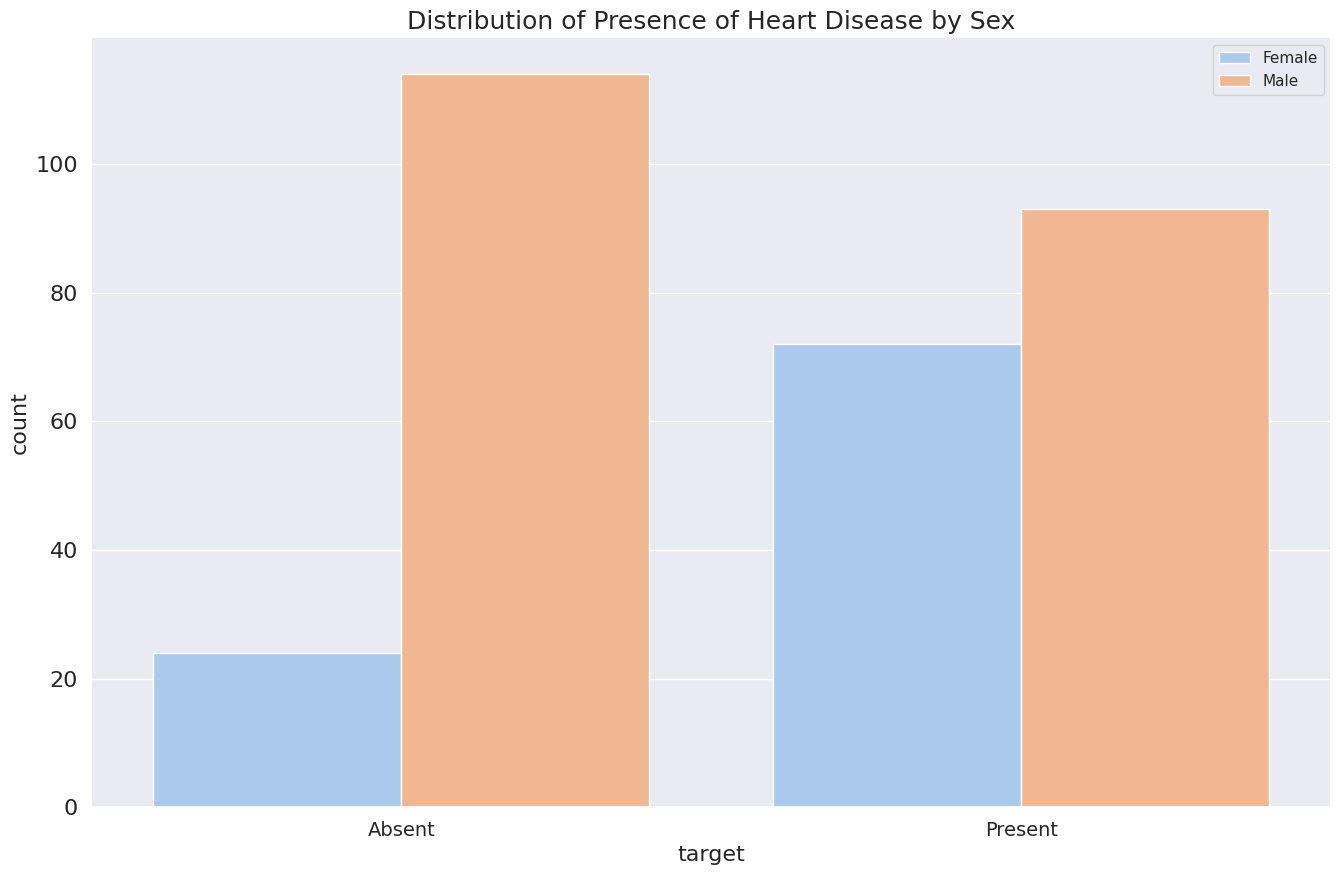

In [17]:
b = sns.countplot(x = 'target', data = df, hue = 'sex')
plt.legend(['Female', 'Male'])
b.set_title('Distribution of Presence of Heart Disease by Sex')
b.set_xticklabels(['Absent', 'Present'])
plt.show()

In [18]:
df.chest_pain.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

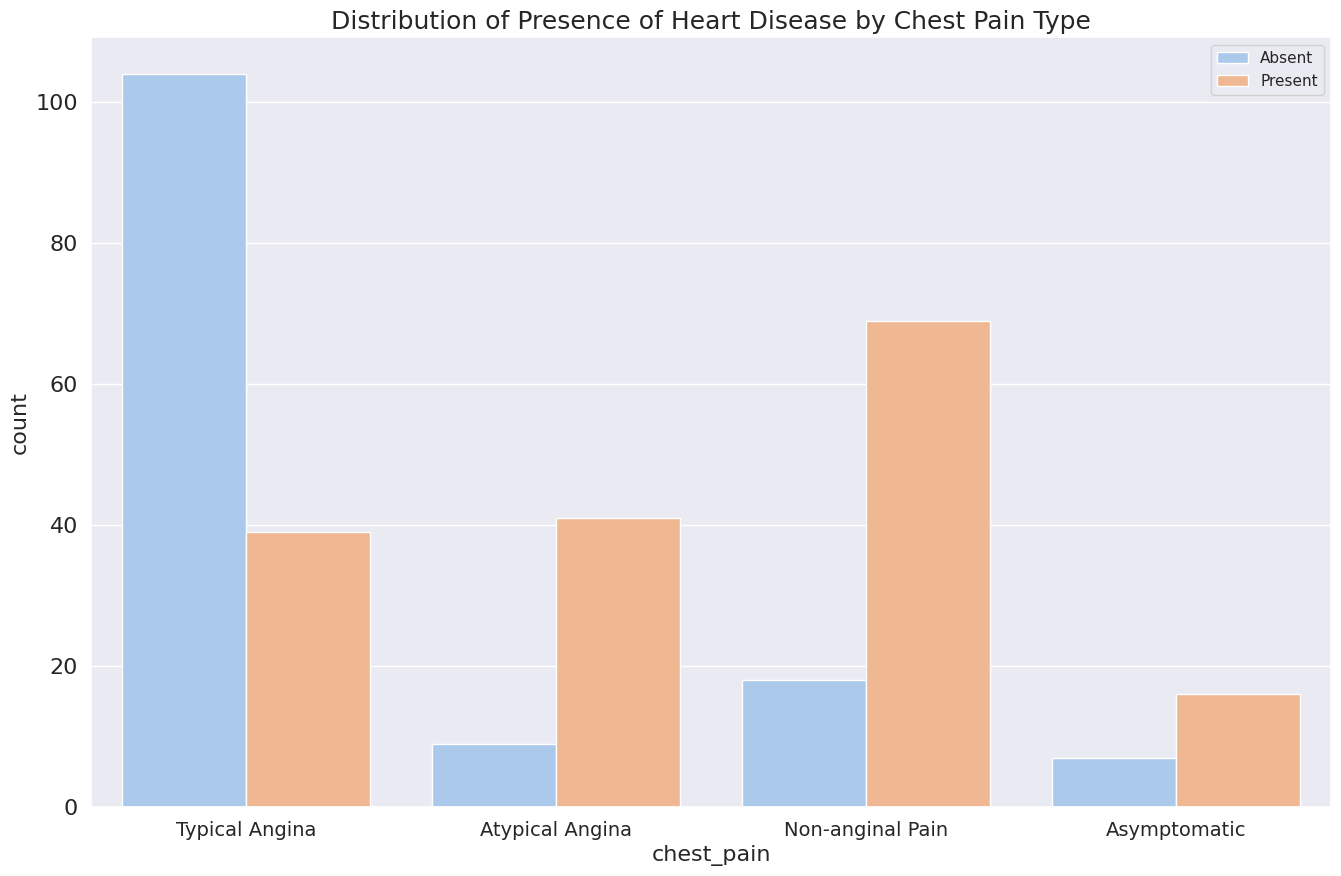

In [19]:
c = sns.countplot(x = 'chest_pain', data = df, hue = 'target')
plt.legend(['Absent', 'Present'])
c.set_title('Distribution of Presence of Heart Disease by Chest Pain Type')
c.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.show()

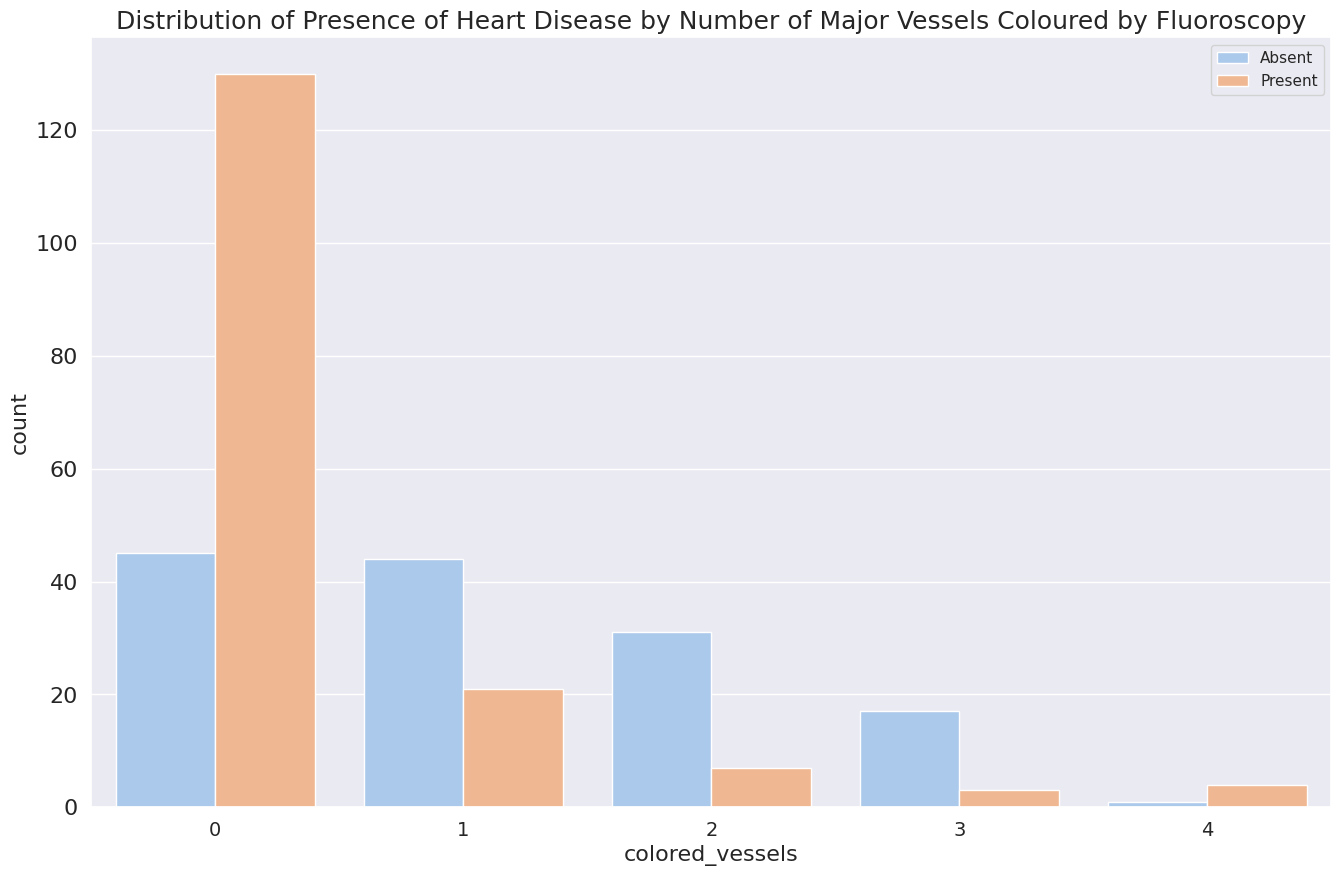

In [20]:
d = sns.countplot(x = 'colored_vessels', data = df, hue = 'target')
plt.legend(['Absent', 'Present'])
d.set_title('Distribution of Presence of Heart Disease by Number of Major Vessels Coloured by Fluoroscopy')
plt.show()

In [21]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

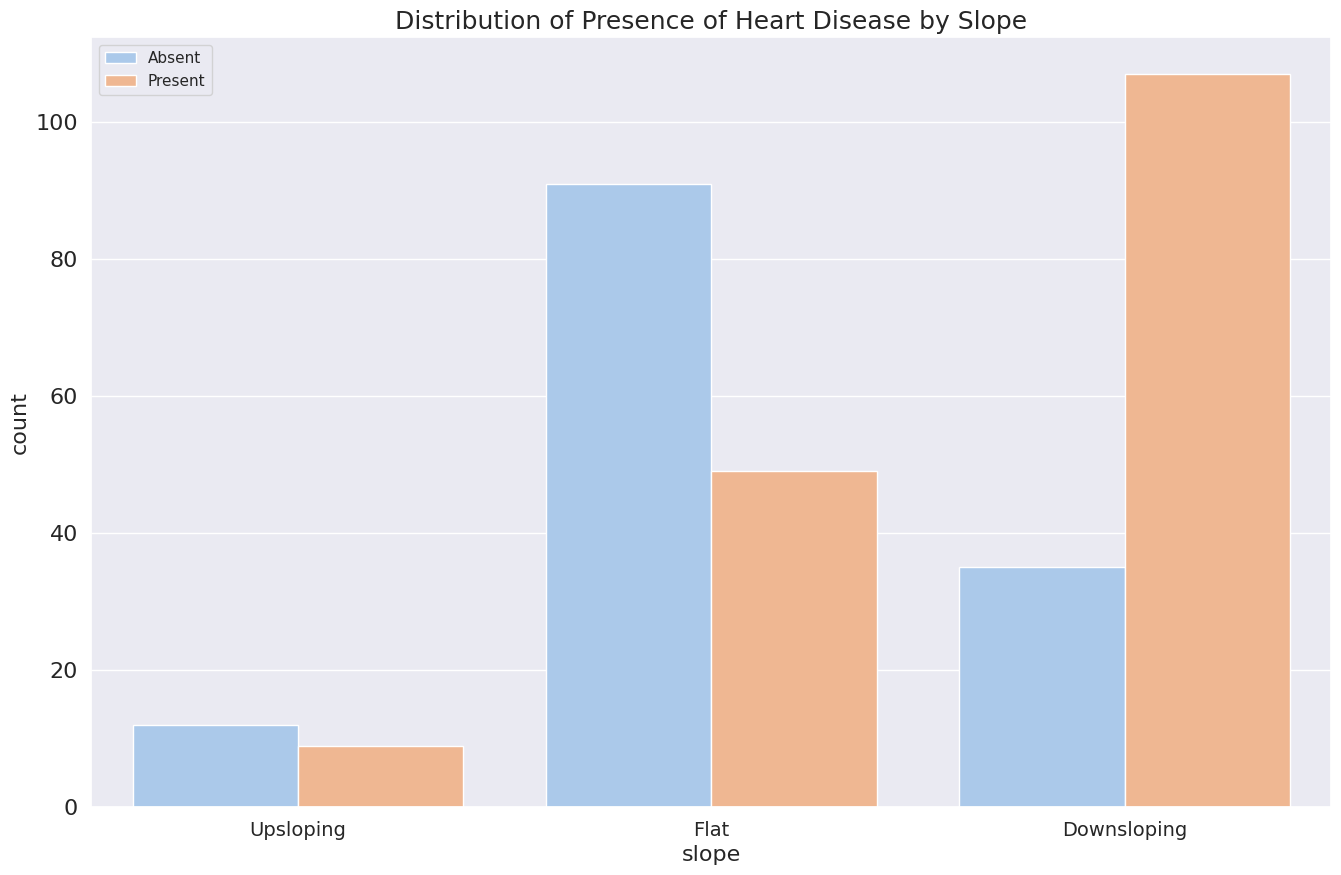

In [22]:
f = sns.countplot(x = 'slope', data = df, hue = 'target')
plt.legend(['Absent', 'Present'])
f.set_title('Distribution of Presence of Heart Disease by Slope')
f.set_xticklabels(['Upsloping', 'Flat', 'Downsloping'])
plt.show()

In [23]:
sns.set(style = 'whitegrid', palette = 'colorblind', 
rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, "xtick.labelsize" : 16, "ytick.labelsize" : 16 
})

Text(0, 0.5, 'Maximum Heart Rate')

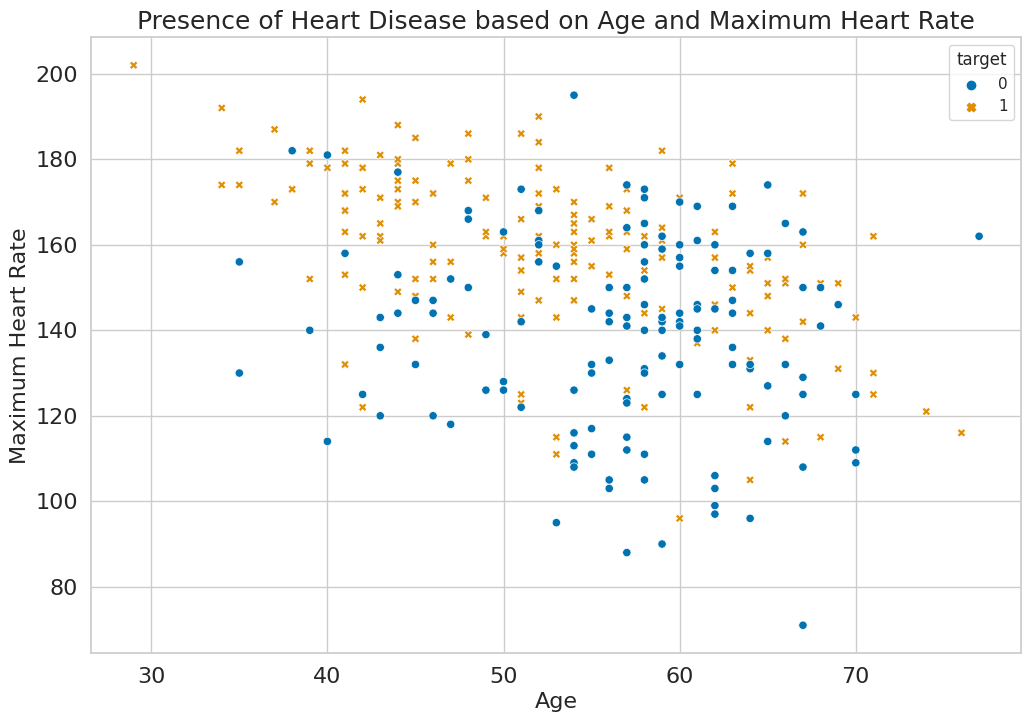

In [24]:
f = sns.scatterplot(x = 'age', y = 'max_hr', hue = 'target', style = 'target', data = df)
f.set_title('Presence of Heart Disease based on Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

In [25]:
df['age_category'] = pd.cut(df.age, bins = list(np.arange(25, 85, 5)))

Text(0, 0.5, 'Count')

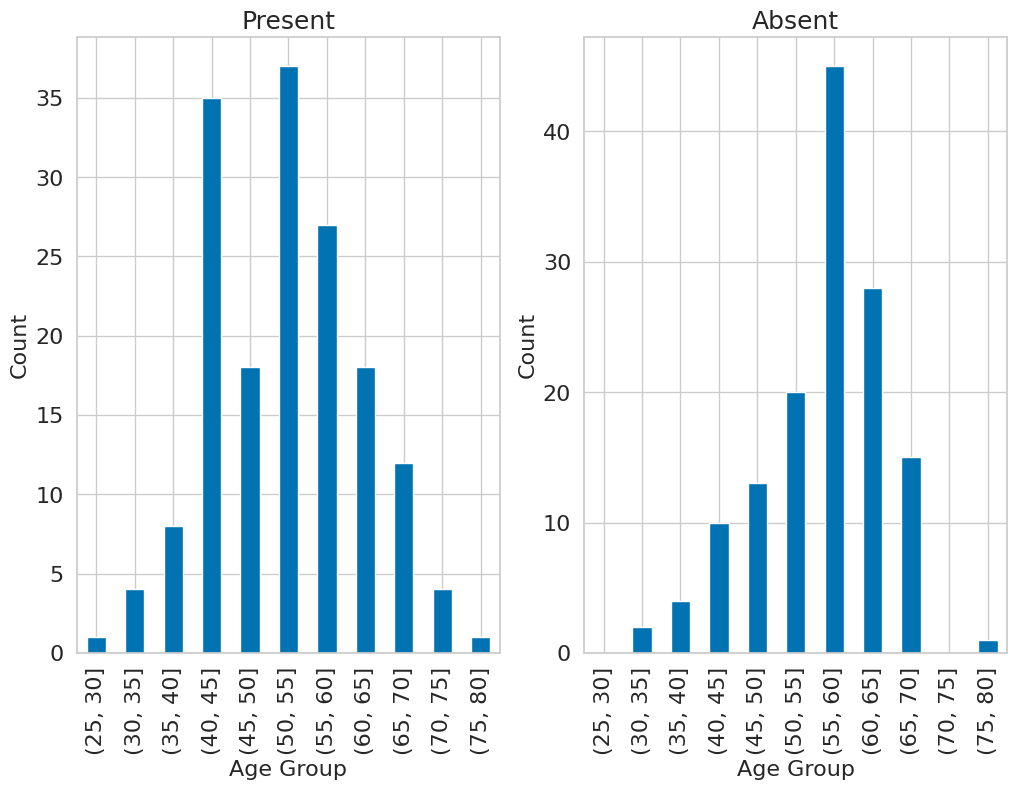

In [26]:
plt.subplot(121)
df[df.target == 1].groupby('age_category')['age'].count().plot(kind = 'bar')
plt.title('Present')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.subplot(122)
df[df.target == 0].groupby('age_category')['age'].count().plot(kind = 'bar')
plt.title('Absent')
plt.xlabel('Age Group')
plt.ylabel('Count')

Text(0, 0.5, 'Cholesterol')

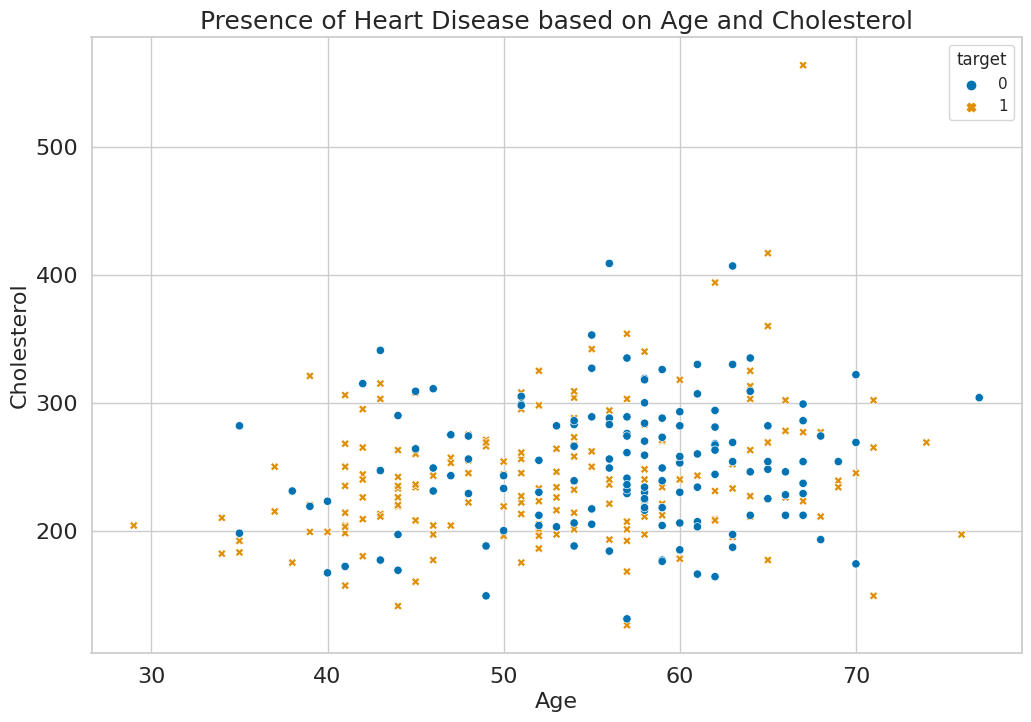

In [27]:
g= sns.scatterplot(x = 'age', y = 'chol', hue = 'target', style = 'target', data = df)
g.set_title('Presence of Heart Disease based on Age and Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

Text(0, 0.5, 'Count')

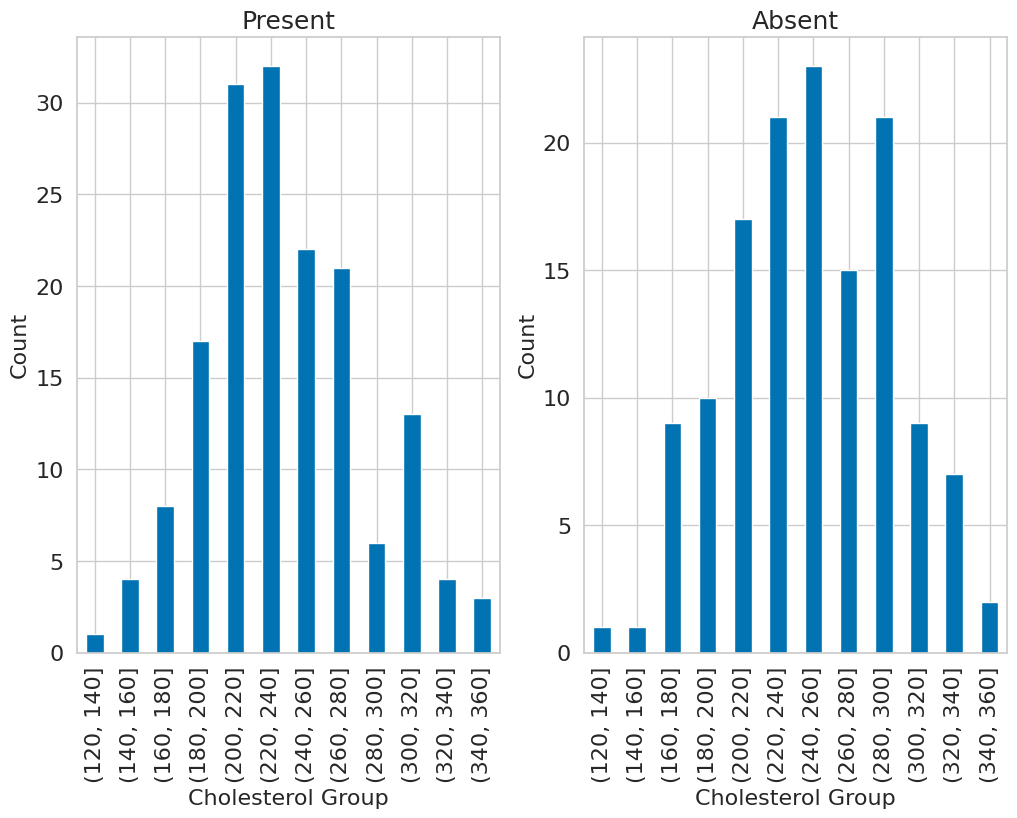

In [28]:
df['chol_cat'] = pd.cut(df.chol, bins = list(np.arange(120, 380, 20)))
df['chol_cat'] = pd.cut(df.chol, bins = list(np.arange(120, 380, 20)))

plt.subplot(121)
df[df.target == 1].groupby('chol_cat')['chol'].count().plot(kind = 'bar')
plt.title('Present')
plt.xlabel('Cholesterol Group')
plt.ylabel('Count')

plt.subplot(122)
df[df.target == 0].groupby('chol_cat')['chol'].count().plot(kind = 'bar')
plt.title('Absent')
plt.xlabel('Cholesterol Group')
plt.ylabel('Count')

<ipython-input-29-ff1524ba49c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt =  '.1f', ax = ax)


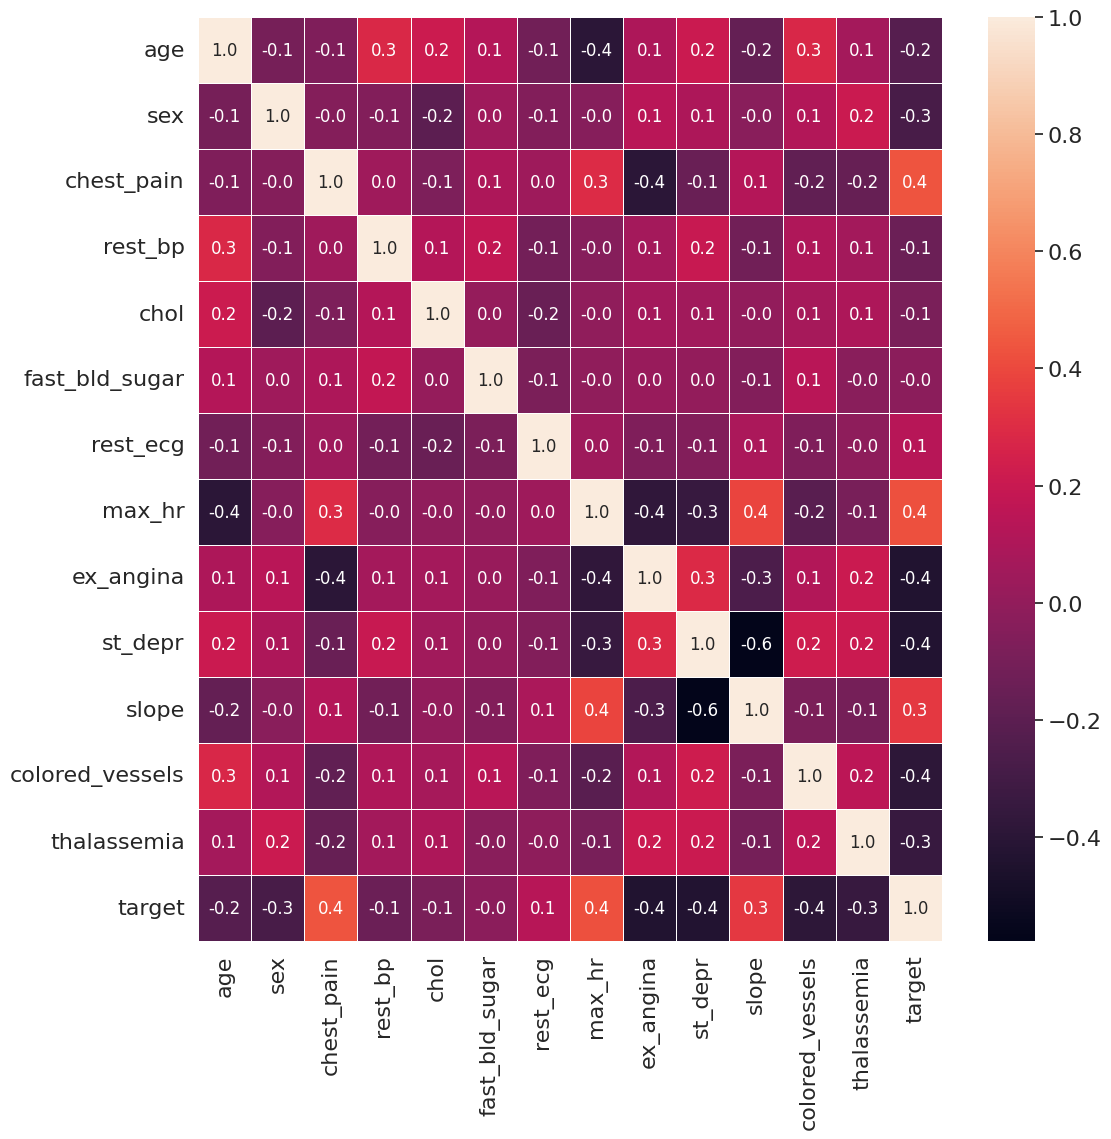

In [29]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt =  '.1f', ax = ax)
plt.show()